# Practice : Cat VS Dog

Here, we’re going to see if the neuron we created in the notebook can already try to classify images.  
We have pictures of dogs and cats, and the goal is to correctly sort them into the "dog" or "cat" class.

To do this, we’ll use **two datasets**: one for **training** the neuron, and one for **testing** it.

> ### Why do we use two datasets?
>
> If we trained and tested on the same data, the neuron might just *memorize* the answers without really learning how to generalize.  
> 
> By training on one set and testing on a different one, we check if the neuron truly **understands** how to recognize *new, unseen* images.
>
> It's just like preparing for an exam: practicing with exercises is great, but the real test is solving **new problems** you haven’t seen before!




In [148]:
#%pip install h5py
#%pip install nbimporter
import matplotlib.pyplot as plt
import nbimporter
from utilities import *
from practice_00 import artificial_neuron, initialisation, model, gradients, update, predict, accuracy_score

In [149]:
X_train, y_train, X_test, y_test = load_data()

In [150]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print(np.unique(y_train, return_counts=True))

X_train shape:  (1000, 64, 64)
y_train shape:  (1000, 1)
(array([0., 1.]), array([500, 500]))


### For the training dataset:

We have 1,000 photos, each of size **64×64 pixels**.

There are also 1,000 labels (one label per photo), either for a **cat** (label `0`) or a **dog** (label `1`).

There are **500 photos** for each label, so the dataset is balanced between cats and dogs.


In [151]:
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print(np.unique(y_test, return_counts=True))

X_test shape:  (200, 64, 64)
y_test shape:  (200, 1)
(array([0., 1.]), array([100, 100]))


### For the test dataset:

Same procedure: we have **200 photos**, with **two labels** (cats and dogs).

There are **100 photos** for each label, so the test set is also balanced.


## Let's display the first 10 photos from the dataset.


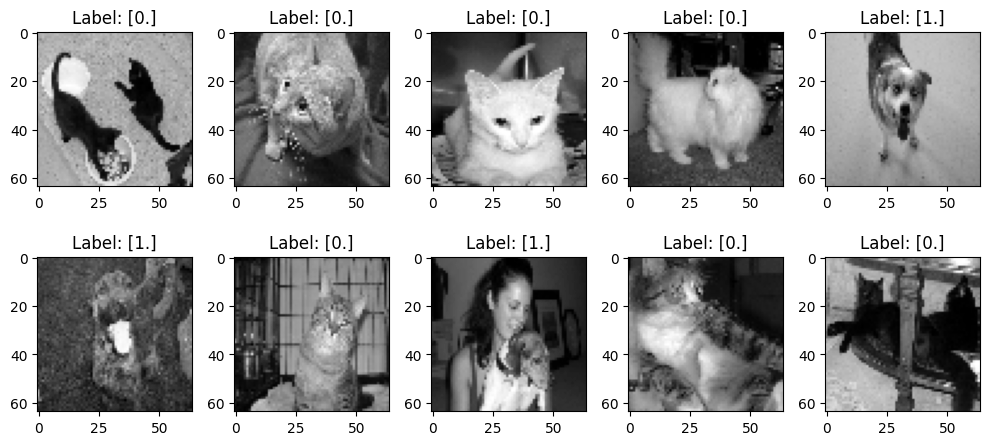

In [152]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.tight_layout()
plt.show()

## How do we feed a photo into our artificial neuron model?

A good question you might be asking right now is: *How do we actually provide a photo to our neuron model?*

**Easy.**  
We treat each pixel of the photo as a variable. Since each photo is **64×64 pixels**, that gives us **64×64 = 4096 variables**.

By scanning the pixels from left to right and top to bottom, we build a dataset like this for each photo:  $X = (x_1, x_2, \dots, x_{4096})$ where each variable is a pixel.

From there, it's just like in the previous notebook: we apply a mathematical model to $X$, and predict whether the photo is a **cat** or a **dog**.


## Steps to follow to make a prediction:

1. **Normalize the dataset.**  
   Each pixel is coded on 8 bits. Since $2^8 = 256$, we need to normalize the pixel values between 0 and 1.

2. **Transform each image (64×64 pixels)**  
   into a sequence of variables:  
   $X = (x_1, x_2, \dots, x_{4096})$

3. **Train the model**  
   on the **train_set**.

4. **Evaluate the model**  
   on the **test_set**.


# 1&2. Let's tranform and normalize at the same time
 
Each pixel value originally goes from 0 to 255 (since it's coded on 8 bits).  
To normalize, we simply **divide every pixel value by 255** so that all values are between **0 and 1**.

At the same time, we **reshape** each image:  
Instead of a 64×64 grid for each image, we flatten it into a **single vector** with **4096 variables**.


We want to do something like this:


In [154]:
X_reshaped = []
for image in X_train:
    image_flat = []
    for row in image:
        for pixel in row:
            image_flat.append(pixel / 255)
    X_reshaped.append(image_flat)

X_reshaped = np.array(X_reshaped)
print(X_reshaped.shape)


(1000, 4096)


We can observe two things:

1. We have **normalized** each pixel.
2. We have a **1000 x 4096 input array**, where:
   - Each **row** represents an image (1000 images in total).
   - Each **i-th column** represents the i-th pixel across all 1000 images.


But a **data science way** to do this is by directly calling a function to perform the reshape:


In [155]:
X_train_reshape = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])

For those who are familiar with Python:


In [157]:
# normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train_reshape = X_train.reshape(X_train.shape[0], -1)
X_test_reshape = X_test.reshape(X_test.shape[0], -1)
print(X_train_reshape.shape)
print(X_test_reshape.shape)
print(X_train_reshape[0])


(1000, 4096)
(200, 4096)
[0.6431373  0.68235296 0.6392157  ... 0.34117648 0.7058824  0.15294118]


## Why is it important to normalize our data in data science?

Imagine you're in a band, and you're doing a sound check before a concert. Each instrument — drums, guitar, vocals — plays its part. But if the drums are way louder than everything else, they overpower the mix. That doesn't mean the drums are more important — every instrument has its role to play. 

In data science, it’s the same: if one feature has bigger numbers than the others, the model might "hear" it more, but that doesn’t make it more important than the rest. Normalization is like adjusting the sound levels so that every instrument — or feature — is balanced. That way, the model listens to the whole band, not just the loudest player.

### In one sentence: we normalize to be fair.

## 3. Now it's time to train the model on the training data.


practice_00.ipynb:3: RuntimeWarning: divide by zero encountered in log
  {
practice_00.ipynb:3: RuntimeWarning: invalid value encountered in multiply
  {


[[4.93065614e-09]
 [9.99981841e-01]
 [2.74500483e-22]
 [1.16572719e-06]
 [4.29785557e-09]
 [2.66567030e-04]
 [2.18008338e-07]
 [1.52337140e-08]
 [9.99943269e-01]
 [5.69258756e-13]
 [3.73415754e-08]
 [8.82808667e-09]
 [1.45322130e-07]
 [2.54965852e-10]
 [7.37002267e-01]
 [3.23932677e-10]
 [1.19676526e-06]
 [3.25643412e-03]
 [1.78450303e-16]
 [3.37547491e-09]
 [4.14172875e-05]
 [2.28879919e-03]
 [5.35659794e-10]
 [9.34863125e-06]
 [1.17520149e-05]
 [7.63272411e-12]
 [2.63703627e-10]
 [1.36393550e-11]
 [2.58593319e-14]
 [2.38650030e-01]
 [1.00398667e-04]
 [4.75483838e-06]
 [1.55689474e-08]
 [4.64958418e-06]
 [3.37387169e-16]
 [3.48376371e-12]
 [8.27186700e-02]
 [2.23476989e-11]
 [2.33651253e-02]
 [1.67811073e-09]
 [1.22271394e-09]
 [2.86347690e-19]
 [9.51177218e-10]
 [2.64475168e-01]
 [3.70097869e-01]
 [3.09770603e-18]
 [1.65806210e-09]
 [4.73196447e-12]
 [1.24509792e-10]
 [1.84833345e-06]
 [9.68289880e-01]
 [1.55524879e-09]
 [1.81446164e-09]
 [1.11454565e-06]
 [5.42347600e-11]
 [6.389251

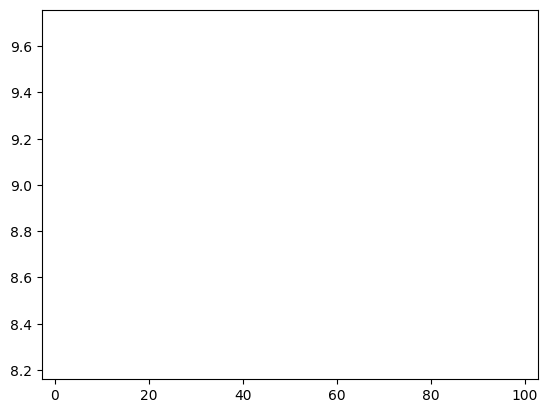

In [ ]:
W, b = artificial_neuron(X_train_reshape, y_train, learning_rate=0.1, num_iter=100)

We’re getting an error that says we’re dividing by 0 inside a log function.  

Let’s break it down:

There’s a `log` involved in the loss function, which itself depends on `A`, and `A` is based on `Z` through an **exponential**.  
Now, remember: the exponential function grows *extremely* fast.  
Even a value around 200 can be enough to completely blow up the computation (way beyond what a computer can handle without overflowing).

Long story short:  
In data science, a very common trick to fix this is to add a tiny constant (called **epsilon**, usually something like 1e-15) to avoid taking the log of zero.  
It’s small enough that it doesn’t mess up the results but big enough to avoid errors.

Let’s see it in code to make it super clear:

In [ ]:
# the problem is in log_loss, look at now in the log :
def log_loss(A, y):
    m = len(y)
    epsilon = 10e-15
    loss = -1/m * np.sum(y * np.log(A + epsilon) + (1 - y) * np.log(1 - A + epsilon))
    return loss

def predict(X, W, b):
    A = model(X, W, b)
    #print(A)
    return A >= 0.5

def new_artificial_neuron(X, y, learning_rate=0.1, num_iter=100):
    # initializer parameters
    W, b = initialisation(X)

    # error visualization : plotting the loss at each iteration
    loss = []

    for i in range(num_iter):
        A = model(X, W, b)
        loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    # Loop finished, best set parameters (W, b)

    y_pred = predict(X, W, b)
    print('accuracy score :', accuracy_score(y, y_pred))

    plt.plot(loss)
    plt.show

Reessayons cette fois ci avec le meme neurone, mais la focntion log_loss regularisee.

accuracy score : 0.506


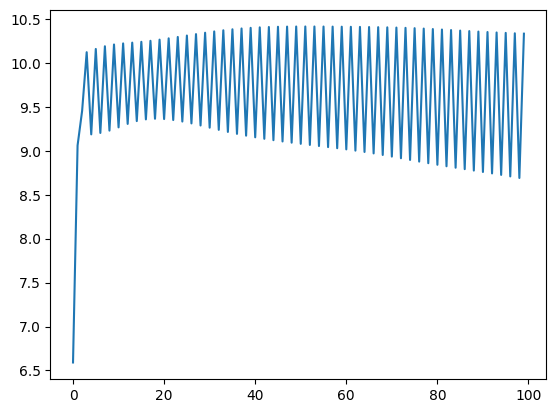

In [160]:
new_artificial_neuron(X_train_reshape, y_train)

Ca marche, mais le comportement est chaotique. Ce comportement est lie a la gestion des hyperparametres, autre theme phare avec la normalisation.

## Hyper-parameters and diaognisis

les hyper parantres sont appele comme cela car ils sont hyper important. ce sont les seuls parametres qui nous permettent den controler notre neurone une fois qu'il est mis en place. On va par exmple decider de sa vitesse d'apprentissage via le learinig rate. mais attention, si on gagne en vitesse, on perd en precision. On va pouvoir determiner a combien de lecons il a le droit pour apprendre avec le nombre d'iterations de la boucle d'apprentissage : une epoch. attention, trop peu de lecons et le neuron n'a pas eu le temps d'apprendre, trop de lecons et vous l'embrouiller l'esprit, excatement comme nous les etre humains finalement.

Le learning rate est la vietsse d'apprentissage de du neurone. rapellez vous, il est directement correle au gradient. Il dicte l'importance qu'a le gradient sur les mises a jour des parametres a chque epoch. Le gradient lui dicte la direction que les parametres doivent prendre pour minimiser la fonction cout. Donc le learning rate dicte l'importance de cette direction. Et si le learning rate est trop grand, on va a chaque fois depasser le set optimal de parametres, et donc la nouvelle direction va nous dire de revenir en arriere, mais on va redepasser le set optimal, en va et veint, et ensuite de suite.

On dirait que c'est exctaement ce qui se passe. essayons alors d'affiner le learning rate et de reduire la vitesse d'apprentissage de 0.1 a 0.01.

accuracy score : 0.52


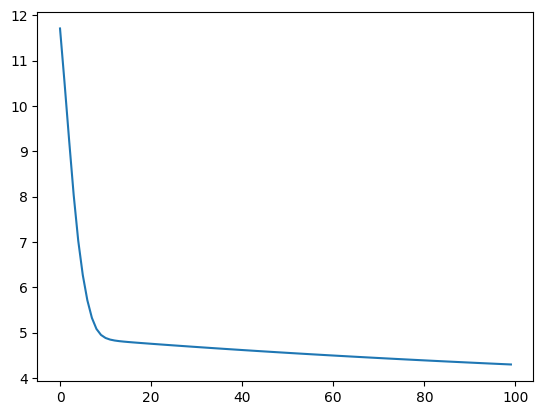

In [ ]:
new_artificial_neuron(X_train_reshape, y_train, learning_rate=0.01, num_iter=100)

pas mal, mais en voit qu'on pourrait encore atteindre un minimum plus bas encore, donc augmentons les epochs :

accuracy score : 0.514


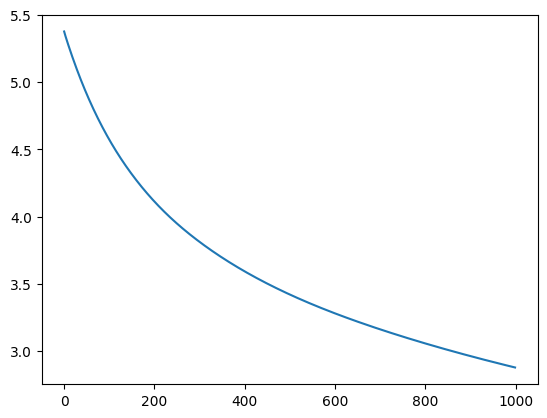

In [162]:
new_artificial_neuron(X_train_reshape, y_train, learning_rate=0.01, num_iter=1000)

ok c'est mieux. tout ca c'est bien beau, mais comment pourrait qualifier si le neurone est bien entrainer ? ok il a bien appris, mais est-il pret pour l'examen ?
Une maniere de juger de cela, est de regarder la courbe d'accuracy a chaue epoch. modifions alors un peu notre neurone :

In [163]:
#%pip install tqdm
from tqdm import tqdm 

In [164]:
def new_artificial_neuron(X, y, learning_rate=0.01, num_iter=10000):
    # initializer parameters
    W, b = initialisation(X)

    # error visualization : plotting the loss at each iteration
    loss = []
    acc = []

    for i in tqdm(range(num_iter)): # progression bar
        A = model(X, W, b)

        if i % 50 == 0: # reduce computing time
            loss.append(log_loss(A, y))
            y_pred = predict(X, W, b)
            acc.append(accuracy_score(y, y_pred))

        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        
    # Loop finished, best set parameters (W, b)

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(loss)
    plt.subplot(1,2,2)
    plt.plot(acc)
    plt.show

100%|██████████| 10000/10000 [02:14<00:00, 74.17it/s]


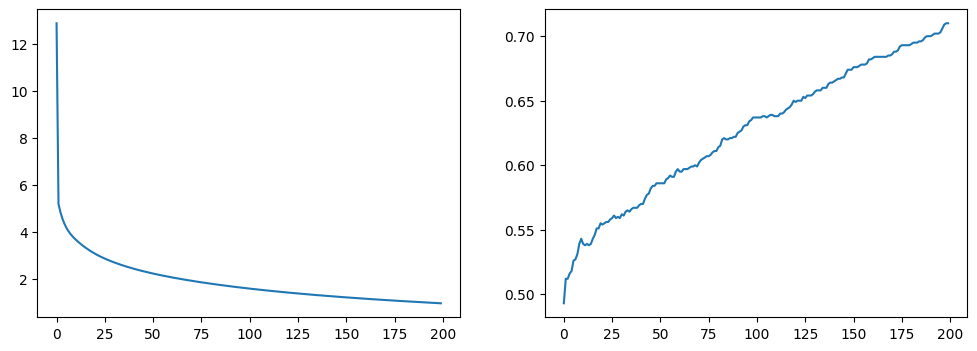

In [165]:
new_artificial_neuron(X_train_reshape, y_train)

On voit que au fur et a mesure que l'erreur diminue (que le neurone apprend), il devient toujours un peu plus juste, ce aui est bon. Mais la, vous devriez vous dire quelqucheose.

Pourquoi la courbe d'apprentissage semble stagnee, trouvee son minimum, alors que la courbe de performance continue d'evolue, d'augmenter ?

A ce moment la, une des reponses les plus probables est que peut etre que le modele est entrain de rentrer en overfitting.

L'overfitting, c'est quand votre modele n'est plus capable de generaliser. Il se focalise tellement sur les exemple du train set (Il se focalise tellement sur les exercices fait en classe) qu'il en perd la capacite de faire des bonnes prediction sur un nouveau jeu de donnees (Il perd la capcite de repondre correctement a l'examen aui est un peu different). C'est excatement comme un humain. Il faut garder un recul sur les exercices, saisir pluoto la methode que la solution specifique de l'exercice pour pouvoir s'adapter le jour de l'examen.

Alors comment detecter si c'est ca le probleme ? bah essayons de le faire predire sur un autre jeu de donnees, le test_set par exemple !!

In [ ]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X_train)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    for i in tqdm(range(n_iter)):
        A = model(X_train, W, b)

        if i % 10 == 0:
            # Train
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))

            # Test
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))

        # mise a jour
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.legend()
    plt.show()

    return (W, b)

100%|██████████| 10000/10000 [02:39<00:00, 62.65it/s]


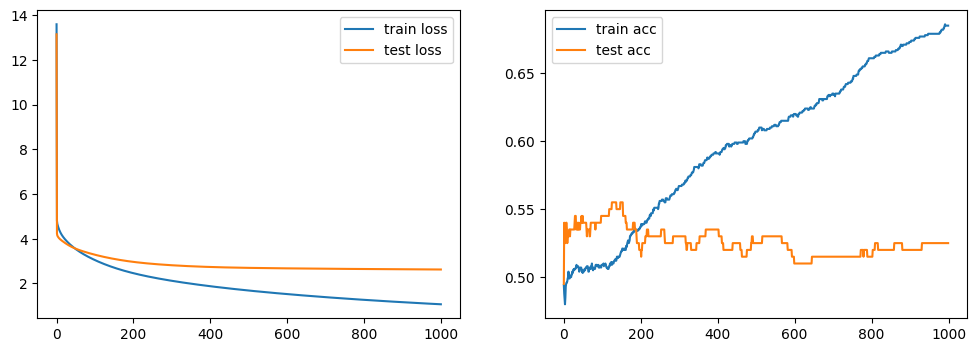

In [167]:
W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate = 0.01, n_iter=10000)


On voit une differnece de comportement du neurone sur les donnees train et test. Tout ca nous indique bien qu'on a un modele en overfitting.

Il y a un decalage de l'errue entre le train set et le test set, signe que le modele fait beaucoup plus d'errue sur le test set que sur le train set. Et o voit la meme chose sur la perfor;qnce, puisau'on voit que le modele a beau s'entrainer encore et encore, ame;iorant ainsi sa performance sur le train set, mais sa capcaite a generalise ce qu'il a appris sur le train set et tres mauvaise comme on peut le voir sur le test_set.

Comment regeler ce problee ?

1) Donner plus de donnees a la machine pour qu'elle aprenne sur des donnees plus variees
2) Reduire le nombre variable
3) technique de regularisation (penalite L1 ou L2)

Mais ici, ca ne va pas vraiment ameliorer les performances de notre modele, car la realité, c'est que notre modele est beaucoup trop simpliste.

Et oui je vous rapelle, depuis le debut on a que un neurone ! Et un neurone, c'est un modele lineaire. C'est a dire au'on ne peut l'utiliser que sur des problmes qu'on peut separer lineairement.

Donc avant de vouloir traiter le probleme d'overfitting, il faut deja ameliorer le modele en lui-meme.
Et pour ca, on va rajouter d'autre neurones, formant ainsi un reseau de neurones artificiesl.